In this chapter, the topic of **`access control`** in `PostgreSQL` is introduced. 

- **`Access control`** is presented as granting and revoking privileges to users and groups on database objects. 
- Using these tools, a database and its objects **can be protected from unauthorized access**, helping to **ensure the `integrity` of the `stored data`**.

In [1]:
import numpy as np
import pandas as pd
import pyodbc
import sqlalchemy
import sqlite3
from subprocess import check_output
import os
from IPython.core.display import Image, display

from sqlalchemy import create_engine
engine = create_engine('sqlite:////...', echo=False)

## 1. Introduction to access control
#### The `default superusers`.
- `Postgres` "superuser" role.
- `Administers` database.
- `Postgres` privileges: `Creating, Dropping` database; `Inserting & deleting` records; `Dropping` tables.
- `Postgres` users should be used with care.

#### Example. A personal finance databse.
Look at the following relation

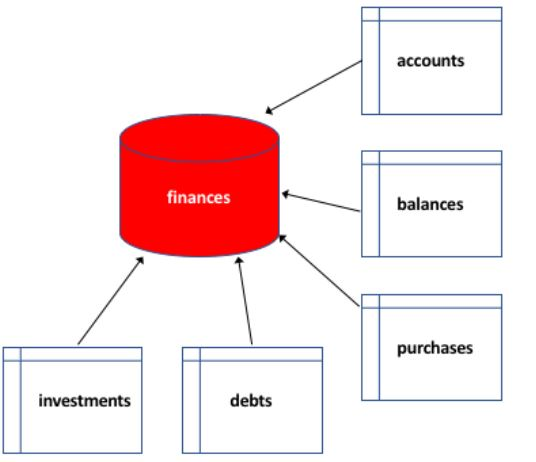

In [2]:
## hidden
Image(r"C:\Users\Admin\Desktop\fig4.JPG", width = 400, height = 450)

#### Remarks.
- `Database` is `personal` and not `publicly accessible`.
- `User` with restricted access should be created.
- `User abilities`: `adding, querying` and `editing` records.


#### How to create a new users in `SQL`?
- The **`CREATE USER`** is used to **generate** a new account; for instance

                CREATE USER new_user;
- Then the `new_user` can create `tables` in your `database`, and
- No `access` to `tables` created by the other users

#### How to set the `users' s passwords`?
- The `password` enhance `security`
- No `passwords` by `default`, for example:

                    CREATE USER new_user WITH PASSWORD "your_password";
                    
                    ALTER USER new_user WITH PASSWORD "new_password";

### EXERCISEs.
#### Exercise 1.1. Creating a new user
The `Small Business Association (SBA) database (sba)` is now live after many weeks of design and development effort. 

Your supervisor has asked you to create a `new user account` for this `database` to be used by a `new hire`, `Sandra Gold`, on the `software development team`.

#### Instructions
Create a `new user` account for `Sandra` with the name `sgold` and password `changeme`.

**SOLUTION.**

                        -- Create sgold with a temporary password
                        CREATE USER sgold WITH PASSWORD 'changeme';
**Comment.** After this implementing; `Sandra` will now have access to the `sba database` using the account name `sgold` and `temporary password: changeme` which can later be changed to a more secure value.

#### Exercise 1.2. Updating user passwords
`Sandra Gold` has just started her new job at the `SBA`. She is excited to get started in this new role. 

On her first day, `her on-boarding process` includes `receiving access` to the `SBA database`. She is instructed to access her account using the `temporary password` that she was given and change her `password` to be more secure. You will have the opportunity to assume the role of Sandra and update the `password` for her account.

#### Instructions
Update the `account password` for the `sgold` user account so that the password is `kxqr478-?egH%&FQ`.

**SOLUTION.**

                    -- Update the password for sgold
                    ALTER USER sgold WITH PASSWORD 'kxqr478-?egH%&FQ';
**Comments.** 
- Now that Sandra's password has been updated to a more secure value, she and her colleagues should feel more confident in the security of her account.
- But notting that typping

                    ALTER USER sgold WITH PASSWORD "kxqr478-?egH%&FQ";
will make an `error message`:

                    syntax error at or near ""kxqr478-?egH%&FQ""

## 2. `PostgreSQL` access `privileges`.
#### PostgreSQL roles & privileges
- Users are a type of role.
- Group roles can also be defined.
- Database object access given to roles.

#### The `GRANT` command.
- Privileges are "granted" to roles by owner
- The **`GRANT`** command bestow privilegers.
- Many privileges can be granted, including: `SELECT, UPDATE, DELETE.` 
- **Syntax**,

                        GRANT p ON obj TO grantee;
                        
#### Example. `Personal finance database.`

                    CREATE TABLE account(
                                          id SERIAL PRIMARY KEY,
                                          short_name VARCHAR(25),
                                          provider_id INTEGER REFERENCES provider(id),
                                          balance DECIMAL
                                         );
                    CREATE USER fin WITH PASSWORD '38\5)uk1+3&}*Y';

**Comments.**
- `fin` user need access to `account` table.
- `fin` access: `add` new accounts; `update & query` accounts.
- **Superuser** `grant` privileges:
            
                    GRANT INSERT ON account TO fin;
                    GRANT UPDATE ON account TO fin;
                    GRANT SELECT ON account TO fin;

#### `Table`  modification privileges
- Some privileges cannot be granted.
- Modifying table requires ownership

                        ALTER TABLE account ADD COLUMN date_opened DATE;
                        ALTER TABLE account RENAME COLUMN short_name TO nick_name;
                        ALTER TABLE account OWNER TO fin;

### EXERCISE
#### Exercise 2.1.  Granting user privileges
`Sandra Gold`'s first development project is the creation of an online platform for processing `loans`. 

This platform will be used to perform actions such as registering new loan applications and updating loan terms. Recall that `loan` data is stored in the `loan` table of the `sba database`. 

**`loan` table.**

|borrower_id|bank_id|approval_date|program|max_amount|gross_approval|term_in_months|revolver_status|bank_zip|initial_interest_rate|
|-|-|-|-|-|-|-|-|-|-|

Your user account can grant privileges to tables in the `sba database`. In this exercise, you will `grant privileges` that Sandra Gold requires to develop the platform for managing `loan processing`.

#### Instructions
**Step 1.** `Grant` the `INSERT` `privilege` on the `loan` table to the `sgold` role.

**SOLUTION.**

                    -- Grant the INSERT privilege
                    GRANT INSERT ON loan TO sgold;

**Step 2.** `Grant` the `UPDATE` `privilege` on the `loan` table to the `sgold` role.

**SOLUTION.**

                    -- Grant the UPDATE privilege
                    GRANT UPDATE ON loan TO sgold;
**Step 3.** `Grant` the `SELECT` `privilege` on the `loan` table to the `sgold` role.

**SOLUTION.**
                
                     -- Grant the SELECT privilege
                     GRANT UPDATE ON loan TO sgold;
**Step 4.** `Grant` the `DELETE` `privilege` on the `loan` table to the `sgold` role.

**SOLUTION.**

                    -- Grant the DELETE privilege
                    GRANT DELETE ON loan TO sgold;
**Comments.** In order for Sandra to fully develop the loan management platform, her account must be provided with the right `privileges`. So we are giving her all of the access to the loan table that she needs to complete this project.

#### Exercise 2.2. Using the granted privileges
Now that Sandra has been granted the `INSERT, UPDATE, SELECT`, and `DELETE privileges`, she has been able to use the loan table. She successfully manages what data is in the table. 

However, she is working on an aspect of her project that requires an alteration to the `loan` table. Specifically, she would like to start capturing the approval date `AND` time of a `loan`. This requires altering the structure of the table using the following commands:

                ALTER TABLE loan DROP COLUMN approval_date;
                ALTER TABLE loan ADD COLUMN approval_dt DATETIME;
In this exercise, you will change ownership of the `loan` table so that Sandra can begin capturing both the approval date and approval time.

#### Instructions
Make `sgold` the owner of the `loan` table so that Sandra can execute the **`ALTER TABLE`** commands above.

**SOLUTION.**

                -- Provide sgold with the required table privileges
                ALTER TABLE loan OWNER TO sgold;
**Comments.** Sandra will not be able to execute the commands that were listed above unless she is the owner of the `loan` table. Only table owners can modify the structure of a `PostgreSQL` table.

## 3. `Hierarchical` access control.
###  Access control with schemas.
- `Schema`-named container for `d.b.` objects.
- `Schemas` can be used for access control.

#### Example. schema use in finances database.
- Spouce access to `finances` database.
- `public` `schema` used by `default`
- The 2 new schemas: `me` and `spouse`.

                    CREATE SCHEMA me;
                    CREATE SCHEMA spouse;
                    
                    CREATE TABLE me.account(...);
                    CREATE TABLE spouse.account(...);
                    
#### Granting `schema` privilege

                    CREATE USER better_half WITH PASSWORD 'changeme';
                    
                    GRANT USAGE ON SCHEMA spouse TO better_half;
                    
                    GRANT USAGE ON SCHEMA public TO better_half;
                    
                    GRANT SELECT, INSERT, UPDATE ON ALL TABLES IN SCHEMA spouse TO better_half;
                    
                    GRANT SELECT, INSERT, UPDATE ON ALL TABLES IN SCHEMA public TO better_half;
                                 
`Schema`-based `access control` implemented.

### Using `group`.
- `Group`: a type of role that identifies one or more users.
- `Access control` can be applied at `group-level`;

                    CREATE GROUP family;
                    
                    GRANT USAGE ON SCHEMA public TO family;
                    
                    GRANT SELECT, INSERT, UPDATE ON ALL TABLES IN SCHEMA public TO family;
                    
                    ALTER GROUP family ADD USER fin;
                    ALTER GROUP family ADD USER better_half;
                    
### Shared and individual data access.
- Shared `schema` access enabled to `public` schema.
- Indiviudal `schema` control data access.

### EXERCISE
#### Exercise 3.1. Working with users and groups
Sandra's project at the `SBA` is turning into a great success. `Loan processing` is now much faster than before the rollout of the online loan platform. This results in the growth of the team responsible for the loan management platform. 

Sandra is now leading the team and recently hired 3 `new developers`. Before the `new developers` begin their first days on the job, Sandra would like to create database accounts for each user and give each account the same `access privileges`.

#### Instructions
- `Create` new user accounts for Ronald Jones (`rjones`), Kim Lopez (`klopez`), and Jessica Chen (`jchen`).
- `Create` a new group named `dev_team`.
- `Grant` the `dev_team` **`INSERT`**, **`UPDATE`**, **`DELETE`**, and **`SELECT`** `privileges` on the `loan` table.
- Add the 3 new user accounts to the `dev_team` group.

**SOLUTION.**

                    -- Create a user account for Ronald Jones
                    CREATE USER rjones WITH PASSWORD 'changeme';

                    -- Create a user account for Kim Lopez
                    CREATE USER klopez WITH PASSWORD 'changeme';

                    -- Create a user account for Jessica Chen
                    CREATE USER jchen WITH PASSWORD 'changeme';

                    -- Create the dev_team group
                    CREATE GROUP dev_team;

                    -- Grant privileges to dev_team group on loan table
                    GRANT INSERT, UPDATE, DELETE, SELECT ON loan TO dev_team;

                    -- Add the new user accounts to the dev_team group
                    ALTER GROUP dev_team ADD USER rjones, klopez, jchen;
**Comments.** Each of the `users` will be ready to utilize their database accounts on day 1 with the creation of their `group` and `user accounts`. Be sure to remind each of the `new hires` to change their `passwords`!

#### Exercise 3.2. Schema privileges
The new software development team members are eager to get started on the `loan` management project. But Sandra, as the team lead, is not comfortable with so many people having direct access to the production version of the `loan` database (in the public `schema`). 

The rapidly growing team must implement some `software development` best practices which include setting up a `development environment` that is separated from the production environment. In this exercise, you will create a new `schema` to represent this development environment and grant members of the software development `team privileges` on this `schema`.

#### Instructions.
- Create a new `schema` named `development`.
- Grant the usage `privilege` on the `development` `schema` to `dev_team`.
- Create a version of the `loan` table under the `development` `schema`.
- Grant `SELECT, INSERT, UPDATE`, and `DELETE` `privileges` to the `dev_team` group for all development `schema tables`.

**SOLUTION.**

                -- Create the development schema
                CREATE SCHEMA development;

                -- Grant usage privilege on new schema to dev_team
                GRANT USAGE ON SCHEMA development TO dev_team;

                -- Create a loan table in the development schema
                CREATE TABLE development.loan(
                                                borrower_id INTEGER,
                                                bank_id INTEGER,
                                                approval_date DATE,
                                                program text NOT NULL,
                                                max_amount DECIMAL(9,2) NOT NULL,
                                                gross_approval DECIMAL(9, 2) NOT NULL,
                                                term_in_months SMALLINT NOT NULL,
                                                revolver_status BOOLEAN NOT NULL,
                                                bank_zip VARCHAR(10) NOT NULL,
                                                initial_interest_rate DECIMAL(4, 2) NOT NULL
                                            );

                -- Grant privileges on development schema
                GRANT SELECT, INSERT, UPDATE, DELETE ON ALL TABLES IN SCHEMA development TO dev_team;
                
**Comments.** After `execution` of these `commands`, the `dev_team` will have their own `loan` table to work on without interacting directly with production data.

## 4. Removing access
#### Example. Rolling back privileges.
We want :
- `Cousin` are interested in database.
- `Superuser` access mistakenly provided.
- Good back up strategy saves the days.

                CREATE USER cousin;
- New `user` account **added**.
                                
                ALTER GROUP family ADD USER cousin;
- or `finances` data is **deleted**. 

                GRANT ALL PRIVILAGES ON finances.* TO cousin;                
- The `privilages` **removed** using **`REVOKE`** `command`; it follow similar format to **`GRANT`**, for example

                REVOKE DELETE, TRUNCATE ON finances.* TO cousin;                
- To**reset** the `privilages`,

                REVOKE ALL PRIVILEGES ON finances.* TO cousin;
                GRANT SELECT ON finances.* TO cousin;
- The **`REVOKE`** can **remove** `users` from `groups`,

                REVOKE family FROM cousin;

### EXERCISEs.
#### Exercise 4.1. Removing user privileges
It seems that success on the loan platform team is contagious. 

One of the team members, Kim Lopez, has been promoted and will be taking on a project management role. She won't need to make any modifications to the loan data going forward. However, having the ability to `query` the `loan` table will still be useful in her new role.

#### Instructions
Remove the `INSERT`, `UPDATE`, and `DELETE` `privileges` that were granted to user account `klopez` for the `loan` table in the `development schema`.

**SOLUTION.**

                    -- Remove the specified privileges for Kim
                    REVOKE INSERT, UPDATE, DELETE ON development.loan 
                    FROM klopez;

**Comments.** While it may not cause any harm to have Kim retain her modification `privileges` for the database, its safer to only give as much access as needed for each person to perform his or her job. Well done!

#### Exercise 4.2. Rescinding group membership
The technology team at the `SBA` would like to be more proactive in assigning database access by group. Each user account must belong to at least one group. 

All project managers will be members of a project_management group. Therefore, Kim Lopez, should be added to this account and removed from the `dev_team` group. This exercise will allow you to manage group membership for these teams.

#### Instructions
- Create a new group named `project_management`.
- Grant the project_management group the `SELECT` `privilege` on the `loan` table.
- Add user `klopez` to the `project_management` group.
- Remove user `klopez` from the `dev_team` group.

**SOLUTION.**

                -- Create the project_management group
                CREATE GROUP project_management;

                -- Grant project_management SELECT privilege
                GRANT SELECT ON loan TO project_management;

                -- Add Kim's user to project_management group
                ALTER GROUP project_management ADD USER klopez;

                -- Remove Kim's user from dev_team group
                REVOKE klopez FROM dev_team;

**Comments.** The `SBA team` is well on its way to implementing very organized access management system. Managing `privileges` for groups is easier than relying soley on `user-level` `privileges`.

#### Exercise 4.3. Implementing access control for teams
In this chapter, you learned how to control access to your databases. This brings us to the final exercise in the course. You will create a new `schema` and `table` for holding data that will be provided to data scientists on your team. While your team members are likely responsible individuals, accidents can happen.

You should only give these team members as much control over the database as required to do their job. These team members will have access to data on loans that have not been approved.
- The schema `analysis` will be created.
- The table `unapproved_loan` will be defined in this new `schema`.
- User `data_scientist` will be created.
- The `user` will be restricted to reading from the new `table`.
This exercise will reinforce the basics of access control for a database.

#### Instructions
- Create a new schema named `analysis` which will hold our new table.
- Create a new table `unapproved_loan` within the `analysis` `schema` with a `PRIMARY KEY (id)`, a `FOREIGN KEY (loan_id)` referencing the `id` key of the `loan` table, and a `description` `TEXT` field representing why the `loan` was rejected.
- Add a user named data_scientist with password changeme.
- Restrict the user to have read-only access to the `analysis.unapproved_loan` table.

**SOLUTION.**

                -- Create the new analysis schema
                CREATE SCHEMA analysis;

                -- Create a table unapproved loan under the analysis schema
                CREATE TABLE analysis.unapproved_loan(
                                            id serial PRIMARY KEY,
                                            loan_id INTEGER REFERENCES loan(id),
                                            description TEXT NOT NULL
                                            );
                -- Create 'data_scientist' user with password 'changeme'
                CREATE USER data_scientist WITH PASSWORD 'changeme';

                -- Give 'data_scientist' ability to use 'analysis' schema
                GRANT USAGE ON SCHEMA analysis TO data_scientist;

                -- Grant read-only access to table for 'data_scientist' user
                GRANT SELECT ON analysis.unapproved_loan TO data_scientist;

### SUMMARY.
After all, we have finished 4 chapters in this [course](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/tree/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course3:%20Structure%20of%20PostgreSQL%20Databases); our next steps are:
- Database objects (e.g., [view](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Track:%20SQL%20for%20Database%20Administrators/Course2:%20Database%20Design/database-views.ipynb) & [functions](https://learn.datacamp.com/courses/functions-for-manipulating-data-in-sql-server))
- Another data-types: (such as geometric and [array](https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/SQL%20practices/Functions%20for%20Manipulating%20Data%20in%20PostgreSQL/common-data-types.ipynb)-based)
- another type of normalization (e.g., [`4 NF`](https://www.javatpoint.com/dbms-forth-normal-form))
- `Access control`